# Lets plot correlation plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("penguins.csv")

In [3]:
df.shape

(344, 7)

In [4]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [6]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [7]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

### scatter plot

In [8]:
# Useful for:
# Visualize the relationship between data.

# More info: 
# https://en.wikipedia.org/wiki/Scatter_plot

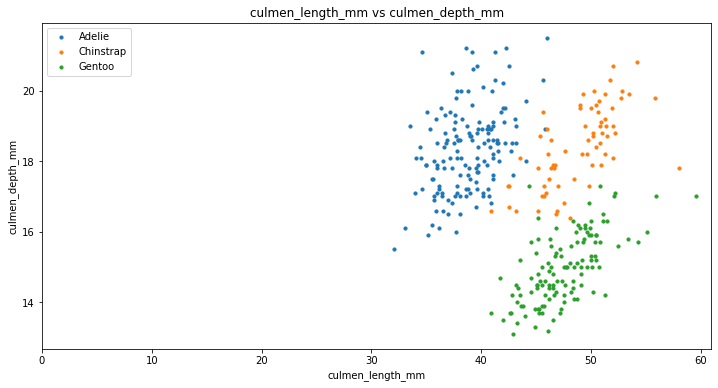

In [9]:
fig = plt.figure(figsize = (12, 6))
ax = fig.add_subplot(1,1,1,)
for cat in sorted(list(df["species"].unique())):
    # filter x and the y for each category
    cl = df[df["species"] == cat]["culmen_length_mm"]
    cd = df[df["species"] == cat]["culmen_depth_mm"]
    ax.scatter(cl, cd, label = cat, s = 10)

ax.set_xlabel("culmen_length_mm") 
ax.set_ylabel("culmen_depth_mm")

ax.set_xlim(-0.01) 
ax.set_title("culmen_length_mm vs culmen_depth_mm")
ax.legend(loc = "upper left", fontsize = 10);

### Scatter plot with linear regression line of best fit

In [10]:
# Useful for:
# This is a normal scatter plot but we also plot a simple regression line to see the 
# correlation between the x and the y variables.

# More info: 
# https://visual.ly/m/scatter-plots-regression-lines/

In [11]:
import seaborn as sns

Text(0.5, 1.0, 'Scatter plot with regression')

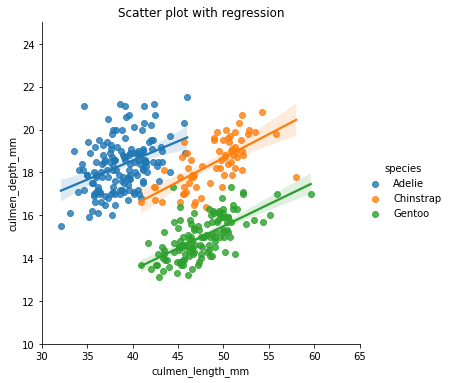

In [12]:
df = df[df["species"].isin(['Adelie', 'Chinstrap', 'Gentoo'])]

# plot the data using seaborn
sns.lmplot("culmen_length_mm", "culmen_depth_mm", df, hue = "species")

ax = plt.gca()

# change the upper limit of the plot to make it more pleasant
ax.set_xlim(30, 65)
ax.set_ylim(10, 25)

# set title
ax.set_title("Scatter plot with regression")

### Scatter plot with regression lines on different axes

(10.0, 25.0)

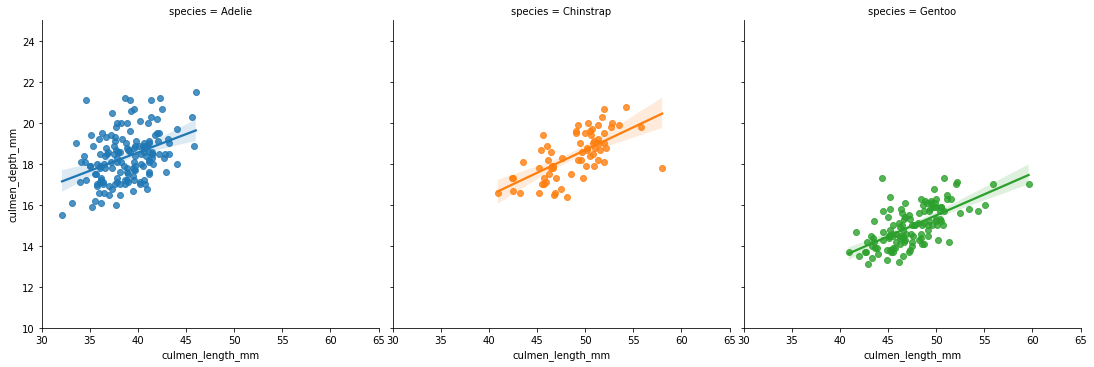

In [13]:
df = df[df["species"].isin(['Adelie', 'Chinstrap', 'Gentoo'])]

# plot the data using seaborn
sns.lmplot("culmen_length_mm", "culmen_depth_mm", df, hue = "species",col = "species")

ax = plt.gca()

# change the upper limit of the plot to make it more pleasant
ax.set_xlim(30, 65)
ax.set_ylim(10, 25)



### Heatmap

In [14]:
# Useful for:
# The correlation plot helps us to comparte how correlated are 2 variables between them

# More info: 
# https://en.wikipedia.org/wiki/Covariance_matrix#Correlation_matrix

In [15]:
# For your info try these colormaps

In [16]:
colormaps = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', \
             'coolwarm','YlGn' 'bwr', 'seismic','viridis']

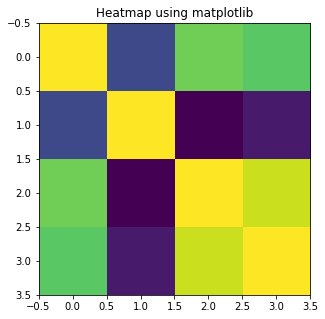

In [17]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()

# plot using matplotlib
ax.imshow(df.corr(), cmap = 'viridis', interpolation = 'nearest')
# set the title for the figure
ax.set_title("Heatmap using matplotlib");

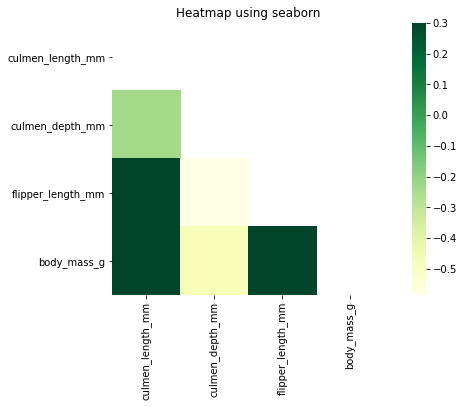

In [18]:
# create a mask to pass it to seaborn and only show half of the cells 
# because corr between x and y is the same as the y and x
# it's only for estetic reasons
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (10, 5))

ax = sns.heatmap(corr, 
                 mask = mask, 
                 vmax = 0.3, 
                 square = True,  
                 cmap = "YlGn")
# set the title for the figure
ax.set_title("Heatmap using seaborn");

### Pairplot

In [19]:
# Useful for:
# Plot pairwise relationships in a dataset. 
# Helps you to see in a glance of an eye all distribution and correlation of variables.

# More info: 
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

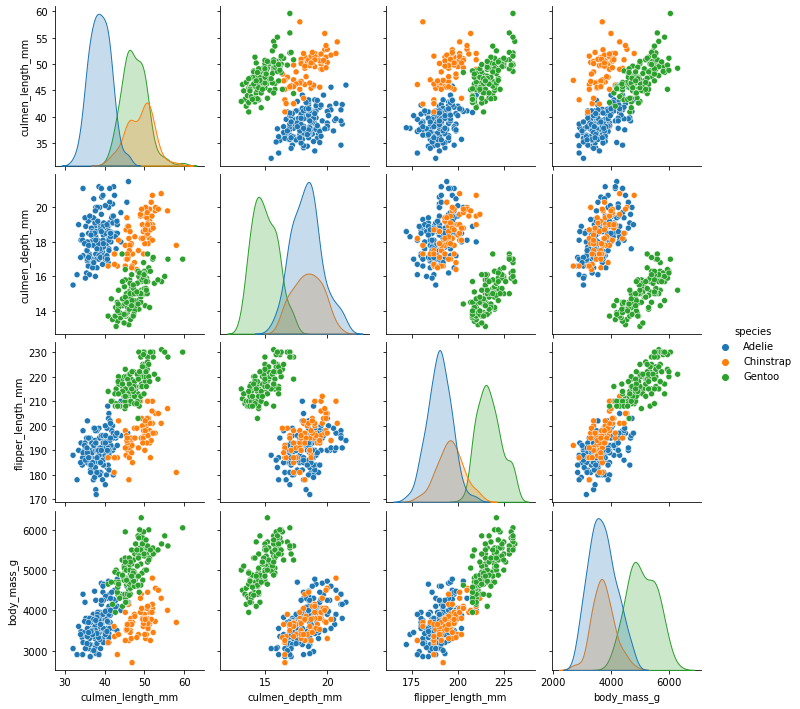

In [20]:
sns.pairplot(df, 
             hue = "species" 
            );

# Thank you